<a href="https://colab.research.google.com/github/Rafaelmllv/ADA-Americanas-Futuro-Polo-Tech/blob/main/Projeto_EDA_Rafael_Vieira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados - World Hapiness Report

Projeto desenvolvido na disciplina de TÉCNICAS DE PROGRAMAÇÃO I (PY) com o professor Sandro Saorin na plataforma ADA, durante o programa Americanas Futuro Polo Tech.

O dataset utilizado é o [World Happiness Report](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021) e para a geração dos insights serão utilizadas as bibliotecas Seaborn e a Plotly.


![https://www.bradaronson.com/happy/](https://bradaronson.com/wp-content/uploads/2013/10/happy.jpg)

### Conteúdo dos Dados

(Descrição original do dataset)

* The hapiness scores and rankings use data from the Gallup World Poll.
    * Gallup World Poll: In 2005, Gallup began its. World Poll, whşch continually surveys citizens in 160 countries, representing more than 98% of the world's adult population. The Gallup World Poll consists of more than 100 global questions as well as region-specific items.
* The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors.
* **Ladder score**: Happiness score or subjective well-being. This is the national average response to the question of life evaluations.
* **Logged GDP per capita**: The GDP-per-capita time series from 2019 to 2020 using countryspecific forecasts of real GDP growth in 2020.
* **Social support**: Social support refers to assistance or support provided by members of social networks to an individual.
* **Healthy life expectancy**: Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year.
* **Freedom to make life choices**: Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” ... It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked
* **Generosity**: Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.
* **Perceptions of corruption**: The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”
* **Ladder score in Dystopia**: It has values equal to the world’s lowest national averages. Dystopia as a benchmark against which to compare contributions from each of the six factors. Dystopia is an imaginary country that has the world's least-happy people. ... * Since life would be very unpleasant in a country with the world's lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia

* World Happiness Report Official Website: https://worldhappiness.report/

In [ ]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Estilo do seaborn:
sns.set_style("whitegrid") 

# Importando o Plotly para a criação do mapa
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot

In [ ]:
# Montando o Google drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


O Dataset é composto por dois arquivos. Vamos verificar o tamanho e as informações básicas de ambos:

In [ ]:
# Importando o dataset, verificando o número de linhas e colunas e exibindo uma prévia
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/world-happiness-report.csv')
print(f'O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas:')
df.head() 

O dataset possui 1949 linhas e 11 colunas:


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [ ]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


- O arquivo é composto de 1949 linhas e 11 colunas(atributos);
- "Country name" é a única variável categórica, e todas as outras são numéricas;
- Existem dados faltantes, que deverão ser observados durante as análises

In [ ]:
# Importando o dataset, verificando o número de linhas e colunas e exibindo uma prévia
df21 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/world-happiness-report-2021.csv')
print(f'O dataset possui {df21.shape[0]} linhas e {df21.shape[1]} colunas:')
df21.head() 

O dataset possui 149 linhas e 20 colunas:


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [ ]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

**Análises preliminares**:

- O arquivo é composto de 149 linhas e 11 colunas(atributos);
- "Country name" e "Regional Indicator"são as únicas variáveis categóricas e todas as outras são decimais (float);
- Este arquivo não possui dados omissos, então não será necessário nenhum tratamento nesse sentido.


In [ ]:
#Estatísticas básicas dos campos numéricos
df21.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


### Distribuição de dados em 2021

Países que compõe a amostra:


In [ ]:
df21['Country name'].unique()

array(['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands',
       'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Israel', 'Germany', 'Canada', 'Ireland',
       'Costa Rica', 'United Kingdom', 'Czech Republic', 'United States',
       'Belgium', 'France', 'Bahrain', 'Malta',
       'Taiwan Province of China', 'United Arab Emirates', 'Saudi Arabia',
       'Spain', 'Italy', 'Slovenia', 'Guatemala', 'Uruguay', 'Singapore',
       'Kosovo', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania',
       'Cyprus', 'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland',
       'Kazakhstan', 'Romania', 'Kuwait', 'Serbia', 'El Salvador',
       'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand',
       'Nicaragua', 'Japan', 'Argentina', 'Portugal', 'Honduras',
       'Croatia', 'Philippines', 'South Korea', 'Peru',
       'Bosnia and Herzegovina', 'Moldova', 'Ecuador', 'Kyrgyzstan',
       'Greece', 'Bolivia', 'Mongolia', 'Paraguay', 'Montenegro

Indicadores Regionais:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


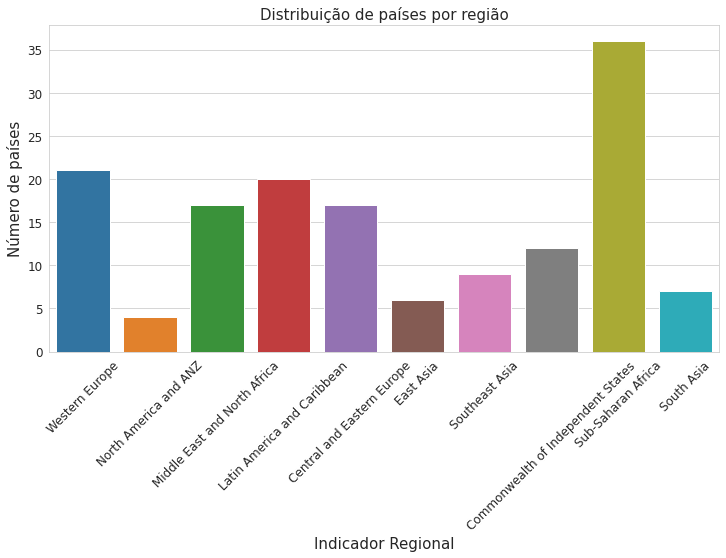

In [ ]:
# count regional indicator
plt.figure(figsize =(12,6))



sns.countplot(df21["Regional indicator"])

plt.xlabel('Indicador Regional', fontsize = 15)

plt.title('Distribuição de países por região', fontsize = 15)

plt.ylabel('Número de países', fontsize = 15)

plt.xticks(fontsize = 12)

plt.yticks(fontsize = 12)

plt.xticks(rotation = 45)

plt.show()

Nota-se que a região com o maior número de países é a África Subsaariana, e com menor número é a América do Norte/Antárctica.

### Dispersão da amostra

Para entender melhor a distribuição dos dados vamos utilizar a técnica de boxplot, que permite representar a dispersão dos dados conforme a figura a seguir:



![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*r41SQj0LbdCV6rWoIos6mA.png)

Para mais informações sobre do diagrama de Boxplot recomento esse [artigo](https://medium.com/@claudio.siervi/interpretando-o-diagrama-de-caixa-boxplot-1876b7c099af).

Como os atributos possuem uma grande diferença entre valores máximos e mínimos, vamos agrupá-los em 3 grupos com intervalos próximos:

- Grupo 1: Suporte social, Liberdade para escolhas de vida, Generosidade e Percepção de Corrupção;

- Grupo 2: Escala de pontos (Ladder Score), PIB per capita(GDP per capita)

- Grupo 3: Espectativa de vida saudável (HLE - Healthy life expectancy)



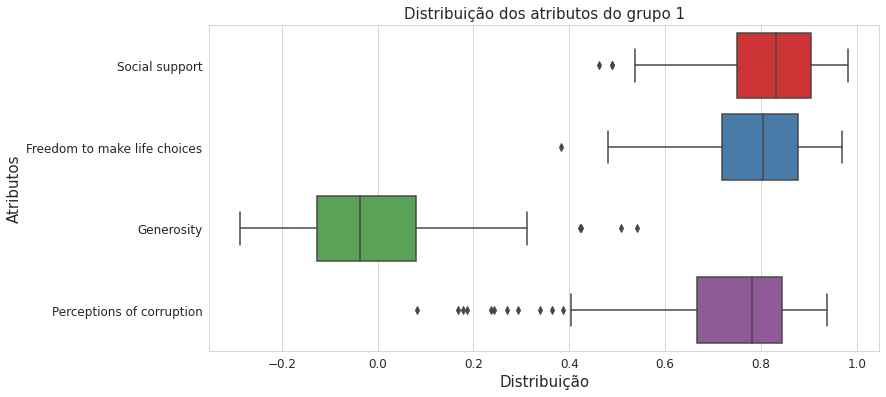

In [ ]:
# Distribuição do grupo 1

list_features = ["Social support","Freedom to make life choices","Generosity","Perceptions of corruption"]

plt.figure(figsize = (12,6))

plt.xlabel('Distribuição', fontsize = 15)

plt.title('Distribuição dos atributos do grupo 1', fontsize = 15)

plt.ylabel('Atributos', fontsize = 15)

plt.xticks(fontsize = 12)

plt.yticks(fontsize = 12)

sns.boxplot(data=df21.loc[:,list_features], orient = "h", palette ="Set1")
plt.show()

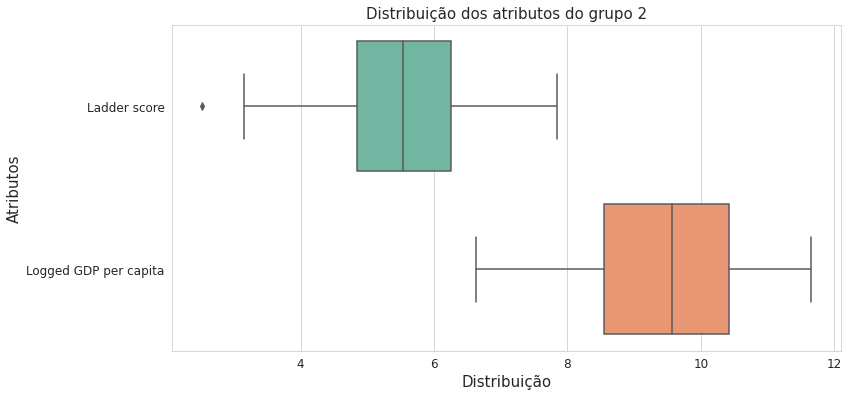

In [ ]:
# Distribuição do grupo 2

list_features = ["Ladder score","Logged GDP per capita"]

plt.figure(figsize = (12,6))

plt.xlabel('Distribuição', fontsize = 15)

plt.title('Distribuição dos atributos do grupo 2', fontsize = 15)

plt.ylabel('Atributos', fontsize = 15)

plt.xticks(fontsize = 12)

plt.yticks(fontsize = 12)

sns.boxplot(data=df21.loc[:,list_features], orient = "h", palette ="Set2")


plt.show()

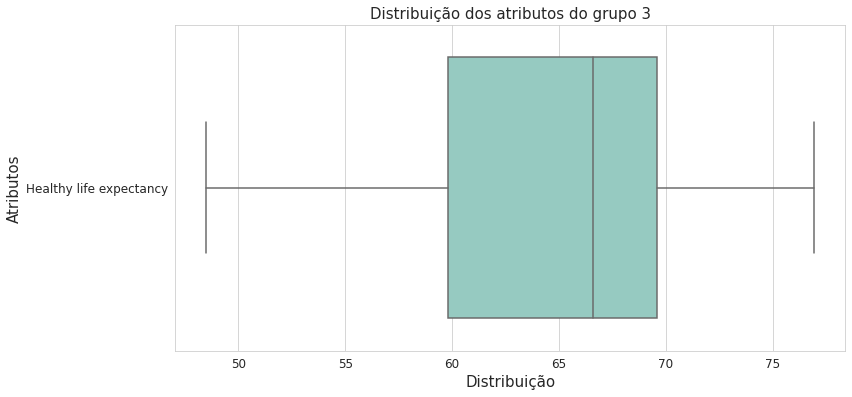

In [ ]:
# distribution of feature set 3

list_features = ["Healthy life expectancy"]

plt.figure(figsize = (12,6))

plt.xlabel('Distribuição', fontsize = 15)

plt.title('Distribuição dos atributos do grupo 3', fontsize = 15)

plt.ylabel('Atributos', fontsize = 15)

plt.xticks(fontsize = 12)

plt.yticks(fontsize = 12)

sns.boxplot(data=df21.loc[:,list_features], orient = "h", palette ="Set3")

plt.show()

### Países mais e menos felizes

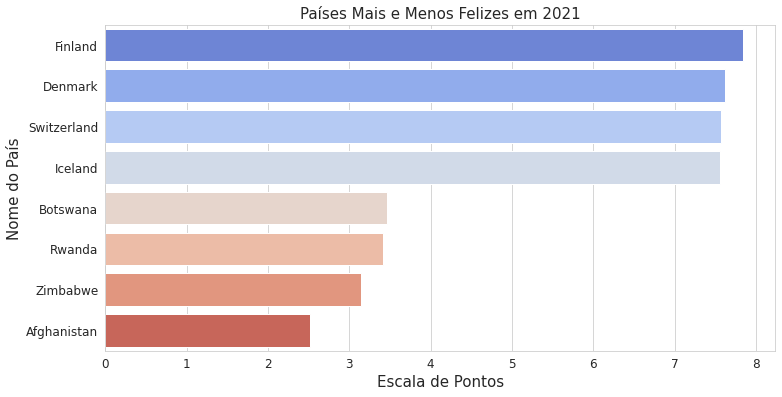

In [ ]:
df21_mais_menos_felizes = df21[(df21.loc[:,"Ladder score"] > 7.5) | (df21.loc[:,"Ladder score"] < 3.5)]

plt.figure(figsize = (12,6))

sns.barplot(x = "Ladder score", y = "Country name", data= df21_mais_menos_felizes, palette = "coolwarm")

plt.title("Países Mais e Menos Felizes em 2021", fontsize = 15)

plt.xlabel('Escala de Pontos', fontsize = 15)

plt.ylabel('Nome do País', fontsize = 15)

plt.xticks(fontsize = 12)

plt.yticks(fontsize = 12)
plt.show()

### Distribuição da Escala de Felicidade por Indicador Regional

Podemos indicar a tendência da Escala de Felicidade utilizando uma estimativa de densidade através da técnica de KDE (Kernel Density Estimate):

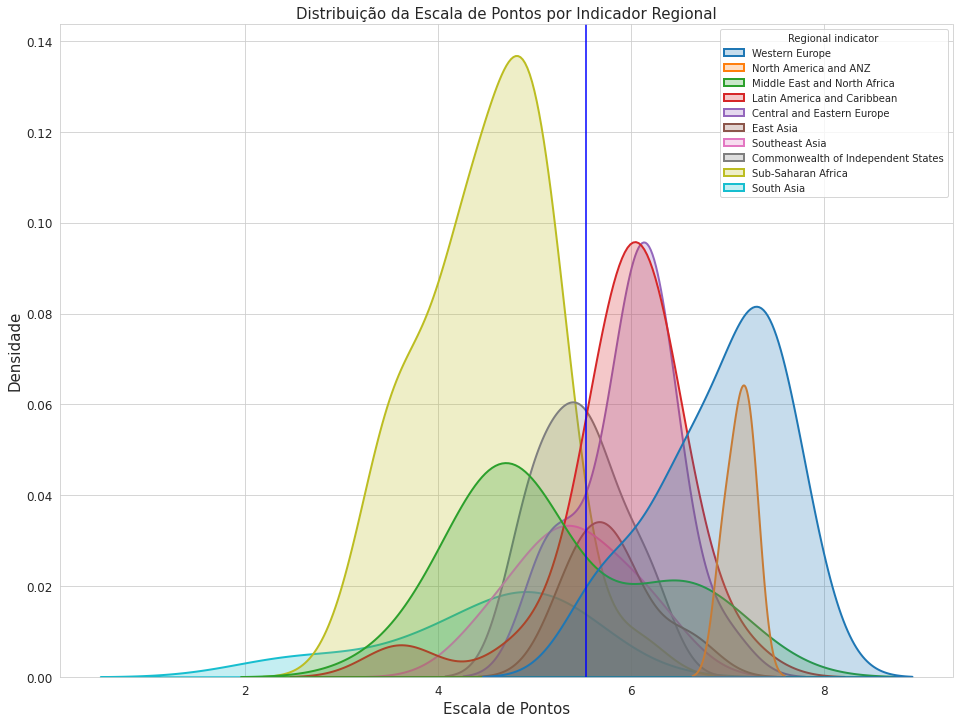

In [ ]:
plt.figure(figsize = (16,12))
sns.kdeplot(df21["Ladder score"], hue = df21["Regional indicator"],fill = True,linewidth=2,multiple="layer") 
plt.axvline(df21["Ladder score"].mean(),c = "b") #Linha que indica a MÉDIA, em Azul.

plt.title("Distribuição da Escala de Pontos por Indicador Regional", fontsize = 15)

plt.xlabel('Escala de Pontos', fontsize = 15)

plt.ylabel('Densidade', fontsize = 15)

plt.xticks(fontsize = 12)

plt.yticks(fontsize = 12)

plt.show()

A Africa Subsaariana possui a maior densidade por conta do grande número de países, mas a Europa Ocidental possui a maior pontuação média, seguida pela America do Norte.

### Distribuição da Escala de Pontos no Mapa

OBS.:Nem todos os países possuem dados para todos os anos

In [ ]:
# Para isso vamos usar a função Choropleth da biblioteca Plotly
fig = px.choropleth(df.sort_values("year"),
                    locations = "Country name",
                    color = "Life Ladder",
                    locationmode = "country names",
                    animation_frame = "year",
                    )
fig.update_layout(title = "Escala de Pontos de Felicidade por País")
fig.show()

### Países Mais e Menos generosos em 2021

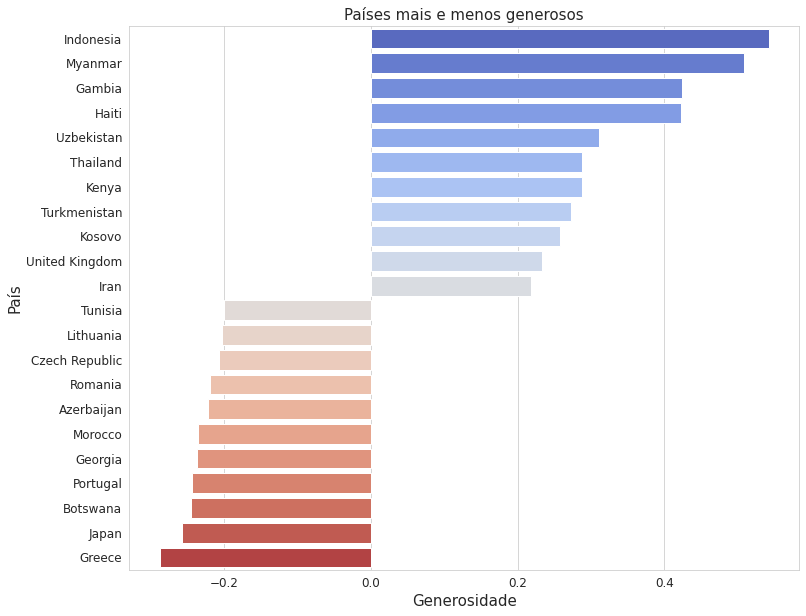

In [ ]:
df21_g = df21[(df21.loc[:,"Generosity"] > 0.2) | (df21.loc[:,"Generosity"] < -0.2)].sort_values(by=["Generosity"], ascending=False)



plt.figure(figsize = (12,10))

sns.barplot(x = "Generosity", y = "Country name", data = df21_g, palette = "coolwarm")

plt.title("Países mais e menos generosos", fontsize = 15)

plt.xlabel('Generosidade', fontsize = 15)

plt.ylabel('País', fontsize = 15)

plt.xticks(fontsize = 12)

plt.yticks(fontsize = 12)

plt.show()

### Comparação de generosidade por País

In [ ]:
# Para isso vamos usar a função Choropleth da biblioteca Plotly
fig = px.choropleth(df.sort_values("year"),
                    locations = "Country name",
                    color = "Generosity",
                    locationmode = "country names",
                    animation_frame = "year",
                    )
fig.update_layout(title = "Generosidade por País")
fig.show()

### Generosidade por Indicador Regional

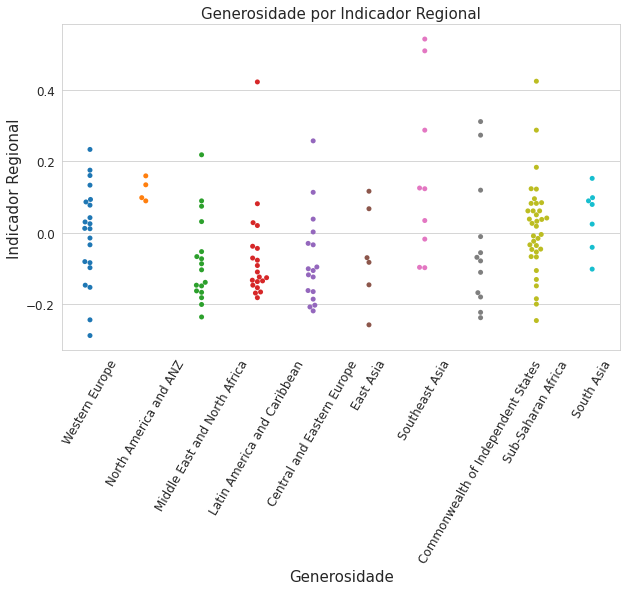

In [ ]:
plt.figure(figsize = (10,6))

sns.swarmplot(x = "Regional indicator", y="Generosity", data = df21)

plt.title("Generosidade por Indicador Regional", fontsize = 15)

plt.xlabel('Generosidade', fontsize = 15)

plt.ylabel('Indicador Regional', fontsize = 15)

plt.xticks(fontsize = 12)

plt.yticks(fontsize = 12)
plt.xticks(rotation = 60)
plt.show()

### Corelação entre as Variáveis

In [94]:
#Gerando a Correlação
df.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.035515,0.078246,-0.010093,0.164059,0.222151,-0.043422,-0.081478,-0.003245,0.196869
Life Ladder,0.035515,1.000000,0.790166,0.707806,0.744506,0.528063,0.190632,-0.427245,0.532273,-0.297488
Log GDP per capita,0.078246,0.790166,1.000000,0.692602,0.848049,0.367932,-0.000915,-0.345511,0.302282,-0.210781
Social support,-0.010093,0.707806,0.692602,1.000000,0.616037,0.410402,0.067000,-0.219040,0.432152,-0.395865
Healthy life expectancy at birth,0.164059,0.744506,0.848049,0.616037,1.000000,0.388681,0.020737,-0.322461,0.318247,-0.139477
Freedom to make life choices,0.222151,0.528063,0.367932,0.410402,0.388681,1.000000,0.329300,-0.487883,0.606114,-0.267661
Generosity,-0.043422,0.190632,-0.000915,0.067000,0.020737,0.329300,1.000000,-0.290706,0.358006,-0.092542
Perceptions of corruption,-0.081478,-0.427245,-0.345511,-0.219040,-0.322461,-0.487883,-0.290706,1.000000,-0.296517,0.264225
Positive affect,-0.003245,0.532273,0.302282,0.432152,0.318247,0.606114,0.358006,-0.296517,1.000000,-0.374439
Negative affect,0.196869,-0.297488,-0.210781,-0.395865,-0.139477,-0.267661,-0.092542,0.264225,-0.374439,1.000000


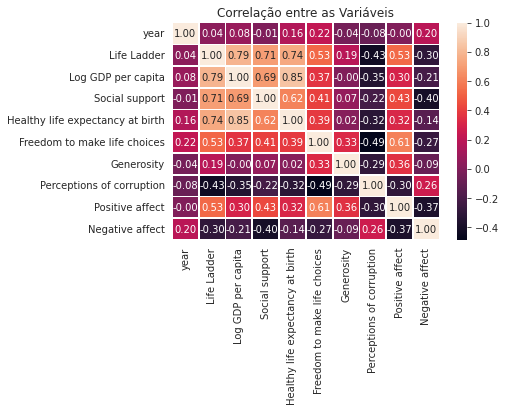

In [96]:
#Plotando a Correlação em um Heatmap
sns.heatmap(df.corr(), annot = True, fmt = ".2f", linewidth = .7)
plt.title("Correlação entre as Variáveis")
plt.show()

A partir das correlações apontadas, verifica-se que existe uma forte correlação positiva entre a **Escala de Pontos de Felicidade** e o **"Log do PIB(GDP) per capita"**, bem como com a **"Expectativa de Vida Saudável ao Nascimento"**. Segue a análise de ambas para o ano de 2021:

<Figure size 1440x576 with 0 Axes>

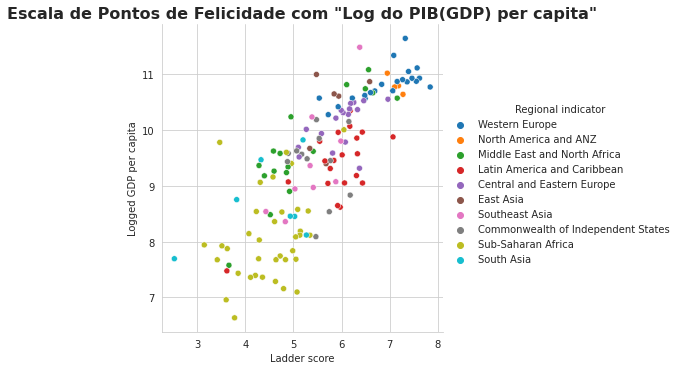

In [103]:
plt.figure(figsize=(20,8))
#OBS: No df21, os nomes das colunas equivalentes é levemente diferente do df "geral"
sns.relplot(x='Ladder score', y='Logged GDP per capita', hue = 'Regional indicator', data=df21)
plt.title('Escala de Pontos de Felicidade com "Log do PIB(GDP) per capita"', fontsize=16, fontweight='bold')
plt.show()

<Figure size 1440x576 with 0 Axes>

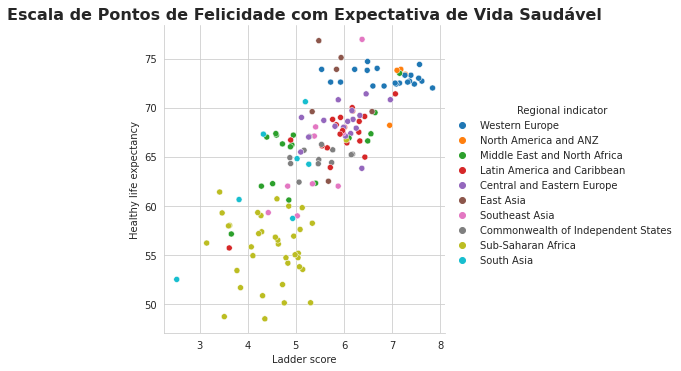

In [106]:
plt.figure(figsize=(20,8))
#OBS: No df21, os nomes das colunas equivalentes é levemente diferente do df "geral"
sns.relplot(x='Ladder score', y='Healthy life expectancy', hue = 'Regional indicator', data=df21)
plt.title('Escala de Pontos de Felicidade com Expectativa de Vida Saudável', fontsize=16, fontweight='bold')
plt.show()

E a correlação positiva entre **"Log do PIB(GDP) per capita"** e **"Expectativa de Vida Saudável ao Nascimento"** foi ainda mais forte do que a Escala de felicidade:

<Figure size 1440x720 with 0 Axes>

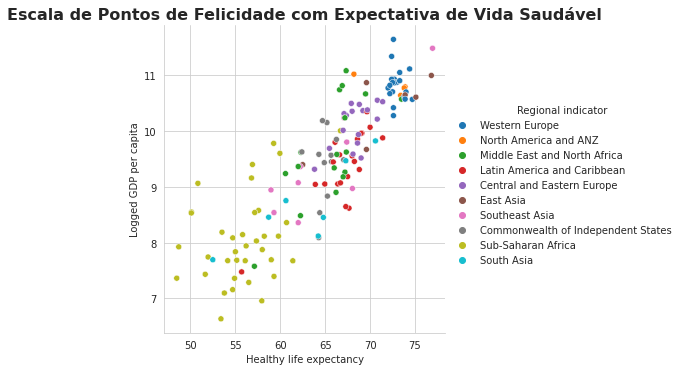

In [117]:
plt.figure(figsize=(20,10))
#OBS: No df21, os nomes das colunas equivalentes é levemente diferente do df "geral"
sns.relplot(x='Healthy life expectancy', y= 'Logged GDP per capita', hue = 'Regional indicator', data=df21)
plt.title('Escala de Pontos de Felicidade com Expectativa de Vida Saudável', fontsize=16, fontweight='bold')
plt.show()

Referências:

https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021

https://betterprogramming.pub/beautiful-plots-with-python-and-seaborn-9d05c9ead6ed

https://medium.com/@claudio.siervi/interpretando-o-diagrama-de-caixa-boxplot-1876b7c099af

https://www.kaggle.com/code/elifozge/world-happiness-eda

https://www.kaggle.com/code/anilcogalan/world-happiness-explanatory-data-analysis/notebook 